99 20.296775817871094
199 18.55988121032715
299 17.285959243774414
399 16.338407516479492
499 15.63035774230957
599 15.098135948181152
699 14.695039749145508
799 14.386807441711426
899 14.148305892944336
999 13.961097717285156
1099 13.811656951904297
1199 13.690057754516602
1299 13.589021682739258
1399 13.50320816040039
1499 13.428695678710938
1599 13.362604141235352
1699 13.302824020385742
1799 13.24780559539795
1899 13.19640827178955
1999 13.147793769836426
[ 0.5583072   0.58172363  0.60427576  0.62592965  0.64665174  0.6664085
  0.6851666   0.7028928   0.7195542   0.7351182   0.7495521   0.7628242
  0.7749025   0.7857559   0.79535335  0.8036648   0.8106604   0.8163111
  0.8205884   0.82346493  0.8249135   0.82490873  0.8234256   0.82044023
  0.81593037  0.8098748   0.8022535   0.7930482   0.78224236  0.7698212
  0.75577164  0.74008256  0.7227457   0.7037541   0.6831042   0.6607946
  0.63682705  0.6112062   0.5839397   0.555039    0.5245189   0.49239838
  0.45870018  0.4234512   0.38

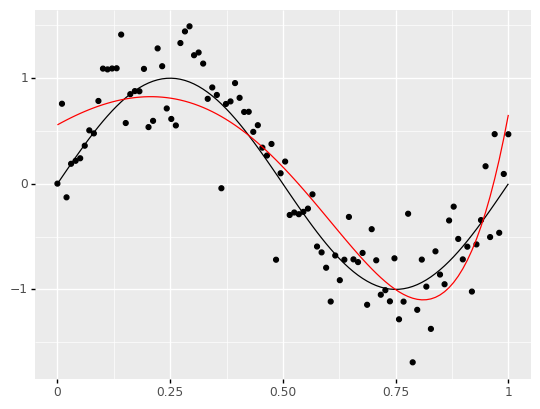

<ggplot: (337400242)>

In [23]:
from plotnine import ggplot, geom_point, geom_line, aes
import dfply
import torch
import numpy as np
from torch.autograd import Variable    


x = torch.linspace(0,1,100)
y = torch.sin(2*torch.pi*x)
target = torch.tensor([a + torch.normal(torch.tensor(0.),torch.tensor(0.3)) for a in y])

class SimpleLinear(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))
        self.f = torch.nn.Parameter(torch.randn(()))
        self.g = torch.nn.Parameter(torch.randn(()))
        self.h = torch.nn.Parameter(torch.randn(()))
        
    def forward(self, x):
        return self.a + self.b*x + self.c*x**2 + self.d*x**3 + self.e*x**4 + self.f*x**5 + self.g*x**6 + self.h*x**7
        

model = SimpleLinear()
mse_loss = torch.nn.MSELoss(reduction='sum')
optim = torch.optim.SGD(model.parameters(), lr=0.005)

for t in range(2000):
    y_pred = model(x)
    loss = mse_loss(y_pred, target)
    if t % 100 == 99:
        print(t, loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()
    
y_pred = model(x)
y_pred = y_pred.cpu().detach().numpy()
print(y_pred)
ggplot(aes(x,y)) + geom_line() + geom_point(aes(x, target))  + geom_line(aes(x, y_pred), color = 'red')